In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn')

In [7]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])


mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])


# Normal Distribution
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape)

print(dist_01)

(500, 2)
(500, 2)
[[ 5.87037905e-01  8.91791100e-01]
 [ 1.10032907e+00 -6.09950161e-01]
 [ 4.63377714e-01  7.62719123e-01]
 [ 1.58623154e+00  2.89496199e-01]
 [ 6.01855550e-01  1.75292764e+00]
 [ 6.22192916e-01  1.05415786e+00]
 [ 1.52871848e+00  1.89914782e+00]
 [ 1.94525840e+00  2.19509686e+00]
 [-8.84132622e-01  1.68416039e+00]
 [-9.57379506e-01  3.18410921e+00]
 [-7.82677867e-03  8.59656085e-01]
 [ 3.18165138e+00 -2.91369993e-01]
 [ 1.15675739e+00  1.37488281e+00]
 [ 1.27938512e+00  3.08156347e+00]
 [ 2.92721947e-01  1.60574148e+00]
 [ 6.19458202e-01  2.67102775e+00]
 [ 1.36813560e+00  1.27726596e+00]
 [ 1.26094460e+00  1.29623686e+00]
 [ 4.67896375e-01 -5.13178911e-01]
 [-5.13486336e-01  4.48740724e-01]
 [ 1.69306518e+00  9.88700667e-01]
 [ 5.31503371e-01  1.58280706e+00]
 [ 1.28792613e+00  1.61413238e+00]
 [-5.52805557e-01  1.59024852e+00]
 [ 1.58422242e+00  1.68364709e+00]
 [ 6.16358701e-01  1.28604295e+00]
 [ 1.10250676e+00  1.57817033e+00]
 [ 1.00264143e+00  9.32138583e-01]
 [

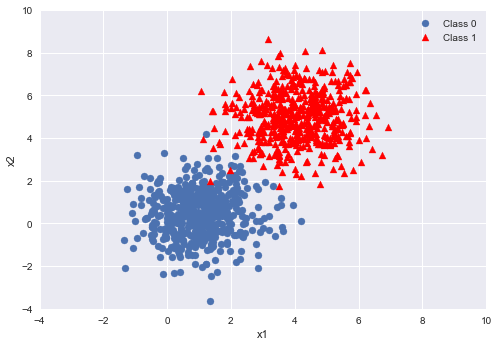

In [8]:
plt.figure(0)
plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-4,10)
plt.ylim(-4,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [6]:
## Splitting Data in Training and Testing Data Set 

In [9]:
data = np.zeros((1000,3))
print(data.shape)

data[:500,:2] = dist_01
data[500:,:2] = dist_02
data[500:,-1] = 1.0

np.random.shuffle(data)
print(data[:10])

split = int(0.8*data.shape[0])

X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test  = data[split:,-1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(1000, 3)
[[ 3.91787256  5.05441882  1.        ]
 [ 4.52403947  5.47130603  1.        ]
 [ 4.15253798  3.59186826  1.        ]
 [ 2.83059725  5.27887288  1.        ]
 [ 0.36291038 -1.45063926  0.        ]
 [ 0.59327918  0.66652119  0.        ]
 [ 1.44466711  0.61504843  0.        ]
 [ 4.1353236   6.57089762  1.        ]
 [ 0.90379234 -0.66127334  0.        ]
 [ 4.61881126  6.63810924  1.        ]]
(800, 2) (200, 2)
(800,) (200,)


In [13]:
## training logistic regression

In [10]:
def hypothesis(x,w,b):
    
    #takes input x input vector,w weight,b bias
    hx= np.dot(x,w)+b
    return sigmoid(hx)
    

In [11]:
def sigmoid(h):
    return (1.0/1.0 + np.exp(-1.0*h))

In [12]:
def error(y,x,w,b):
    m = x.shape[0]
    err = 0.0
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        err += y[i]*np.log2(hx)+(1-y[i])*np.log2(1-hx)
    return err/m

In [13]:
def get_grad(x,w,b,y):
    grad_b = 0.0
    grad_w = np.zeros(w.shape)
    m = x.shape[0]
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        grad_w += (y[i] - hx)*x[i]
        grad_b +=  (y[i]-hx)
    
    grad_w /=m
    grad_b /=m
    return [grad_w,grad_b]

In [14]:
def gradient_descent(x,y,w,b,learning_rate=0.01):
    err = error(y,x,w,b)
    [grad_w,grad_b] = get_grad(x,w,b,y)
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    return err,w,b

In [15]:
def predict(x,w,b):
    
    confidence = hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1

In [16]:
def get_acc(x_tst,y_tst,w,b):
    
    y_pred = []
    
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return  float((y_pred==y_tst).sum())/y_tst.shape[0]

In [17]:
loss = []
acc = []

W = 2*np.random.random((X_train.shape[1],))
b = 5*np.random.random()

In [18]:
for i in range(1000):
    l,W,b = gradient_descent(X_train,Y_train,W,b,learning_rate=0.1)
    acc.append(get_acc(X_test,Y_test,W,b))
    loss.append(l)

<ipython-input-12-f3a9d772c15b>:6: RuntimeWarning: invalid value encountered in log2
  err += y[i]*np.log2(hx)+(1-y[i])*np.log2(1-hx)
<ipython-input-12-f3a9d772c15b>:6: RuntimeWarning: divide by zero encountered in log2
  err += y[i]*np.log2(hx)+(1-y[i])*np.log2(1-hx)
<ipython-input-12-f3a9d772c15b>:6: RuntimeWarning: invalid value encountered in double_scalars
  err += y[i]*np.log2(hx)+(1-y[i])*np.log2(1-hx)
<ipython-input-11-d21e6d446f4e>:2: RuntimeWarning: overflow encountered in exp
  return (1.0/1.0 + np.exp(-1.0*h))
<ipython-input-13-9cac627050a9>:7: RuntimeWarning: invalid value encountered in add
  grad_w += (y[i] - hx)*x[i]


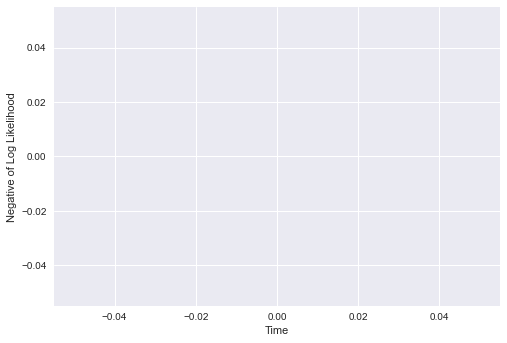

In [19]:
plt.plot(loss)
plt.ylabel("Negative of Log Likelihood")
plt.xlabel("Time")
plt.show()

In [21]:
print(W,b)

[nan nan] nan
